# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

# EDA

In [2]:
df = pd.read_csv("data.txt")
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
total_len = df.shape[0]
abnormal_len = df[df["Class"] == "AB"].shape[0]

print(f"Percentage of data in abnormal category: {(abnormal_len/total_len)*100:.2f}%")

Percentage of data in abnormal category: 67.74%


In [4]:
df["Class"].unique()

array(['AB', 'NO'], dtype=object)

In [5]:
df.loc[df["Class"]=='NO', "Class"] = 0 # Normal 
df.loc[df["Class"]=='AB', "Class"] = 1 # Abnormal

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pelvic Incidence            310 non-null    float64
 1   Pelvic Tilt                 310 non-null    float64
 2   Lumbar Lordosis Angle       310 non-null    float64
 3   Sacral Slope                310 non-null    float64
 4   Pelvic Radius               310 non-null    float64
 5   Grade of Spondylolisthesis  310 non-null    float64
 6   Class                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
df["Class"] = df["Class"].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pelvic Incidence            310 non-null    float64
 1   Pelvic Tilt                 310 non-null    float64
 2   Lumbar Lordosis Angle       310 non-null    float64
 3   Sacral Slope                310 non-null    float64
 4   Pelvic Radius               310 non-null    float64
 5   Grade of Spondylolisthesis  310 non-null    float64
 6   Class                       310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


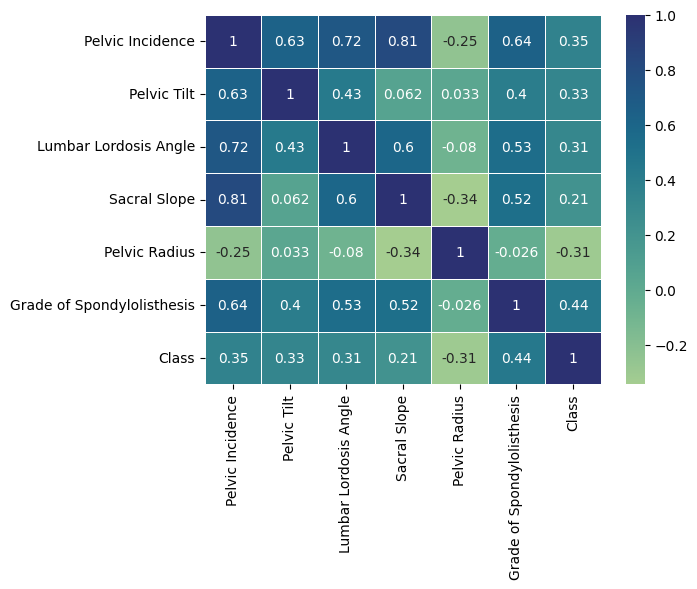

In [9]:
ax = sns.heatmap(df.corr(), linewidth=0.5, annot=True, cmap="crest")
plt.show()

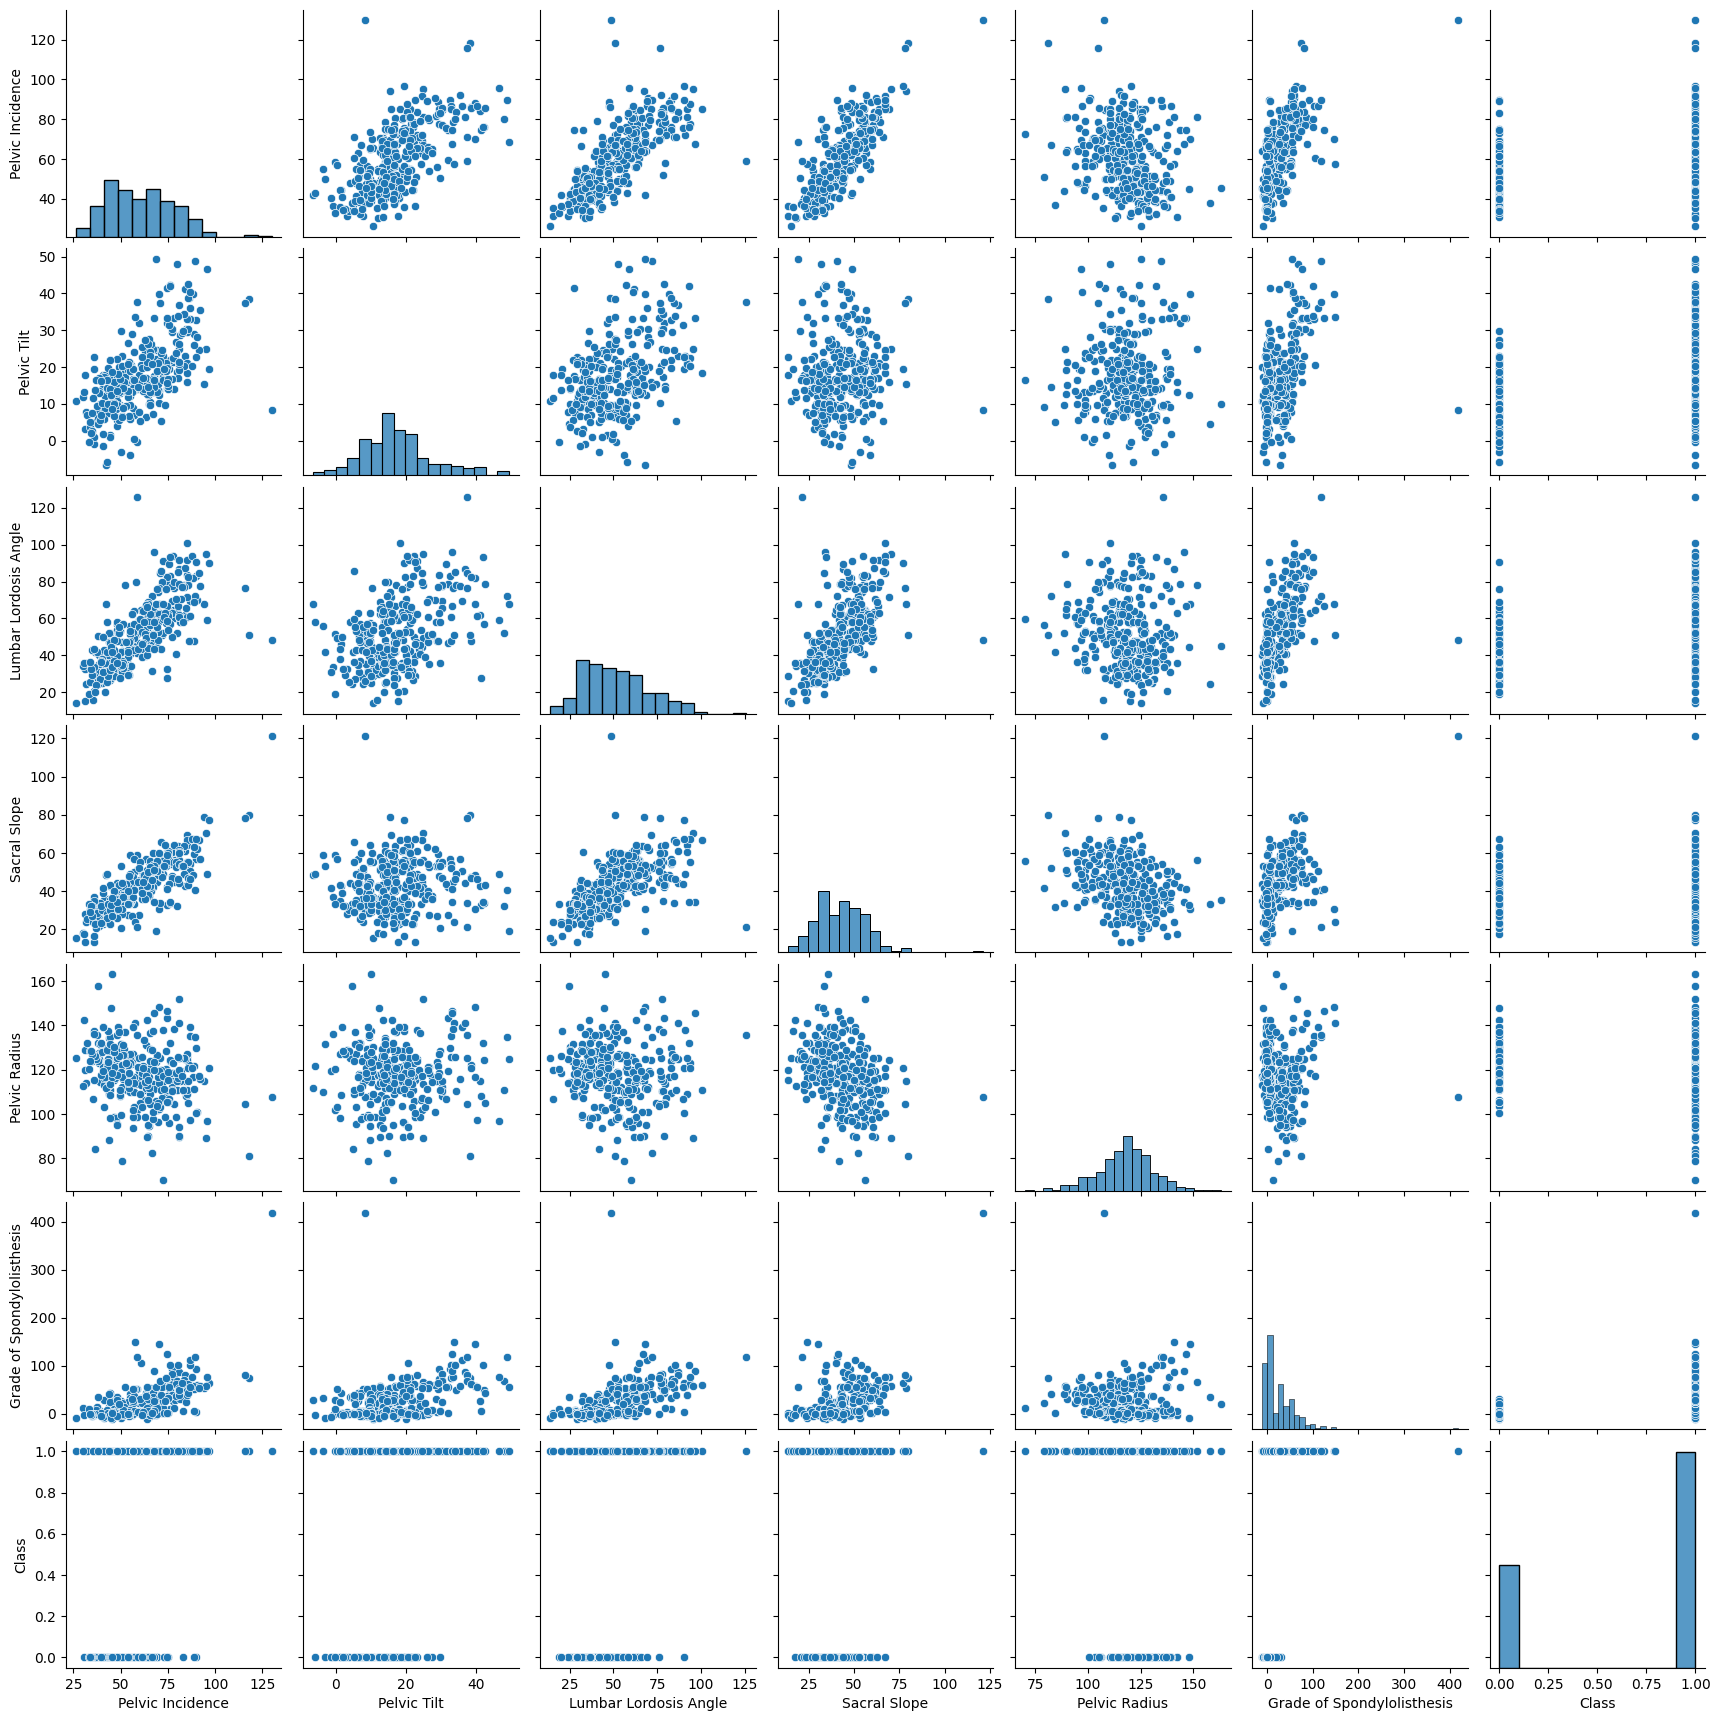

In [10]:
sns.pairplot(df)
plt.show()

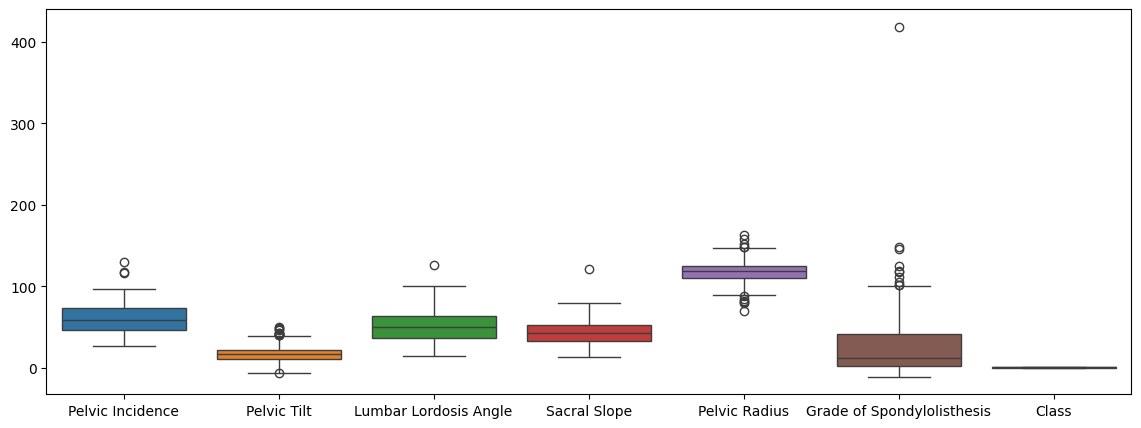

In [11]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.show()

# Machine Learning

### Scaling Data

In [12]:
# Feature selection
X = df.drop(columns=["Class"])
y = df["Class"]

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [17]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=46, max_depth=3)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [18]:
# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8548387096774194
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.87      0.93      0.90        42

    accuracy                           0.85        62
   macro avg       0.85      0.81      0.83        62
weighted avg       0.85      0.85      0.85        62



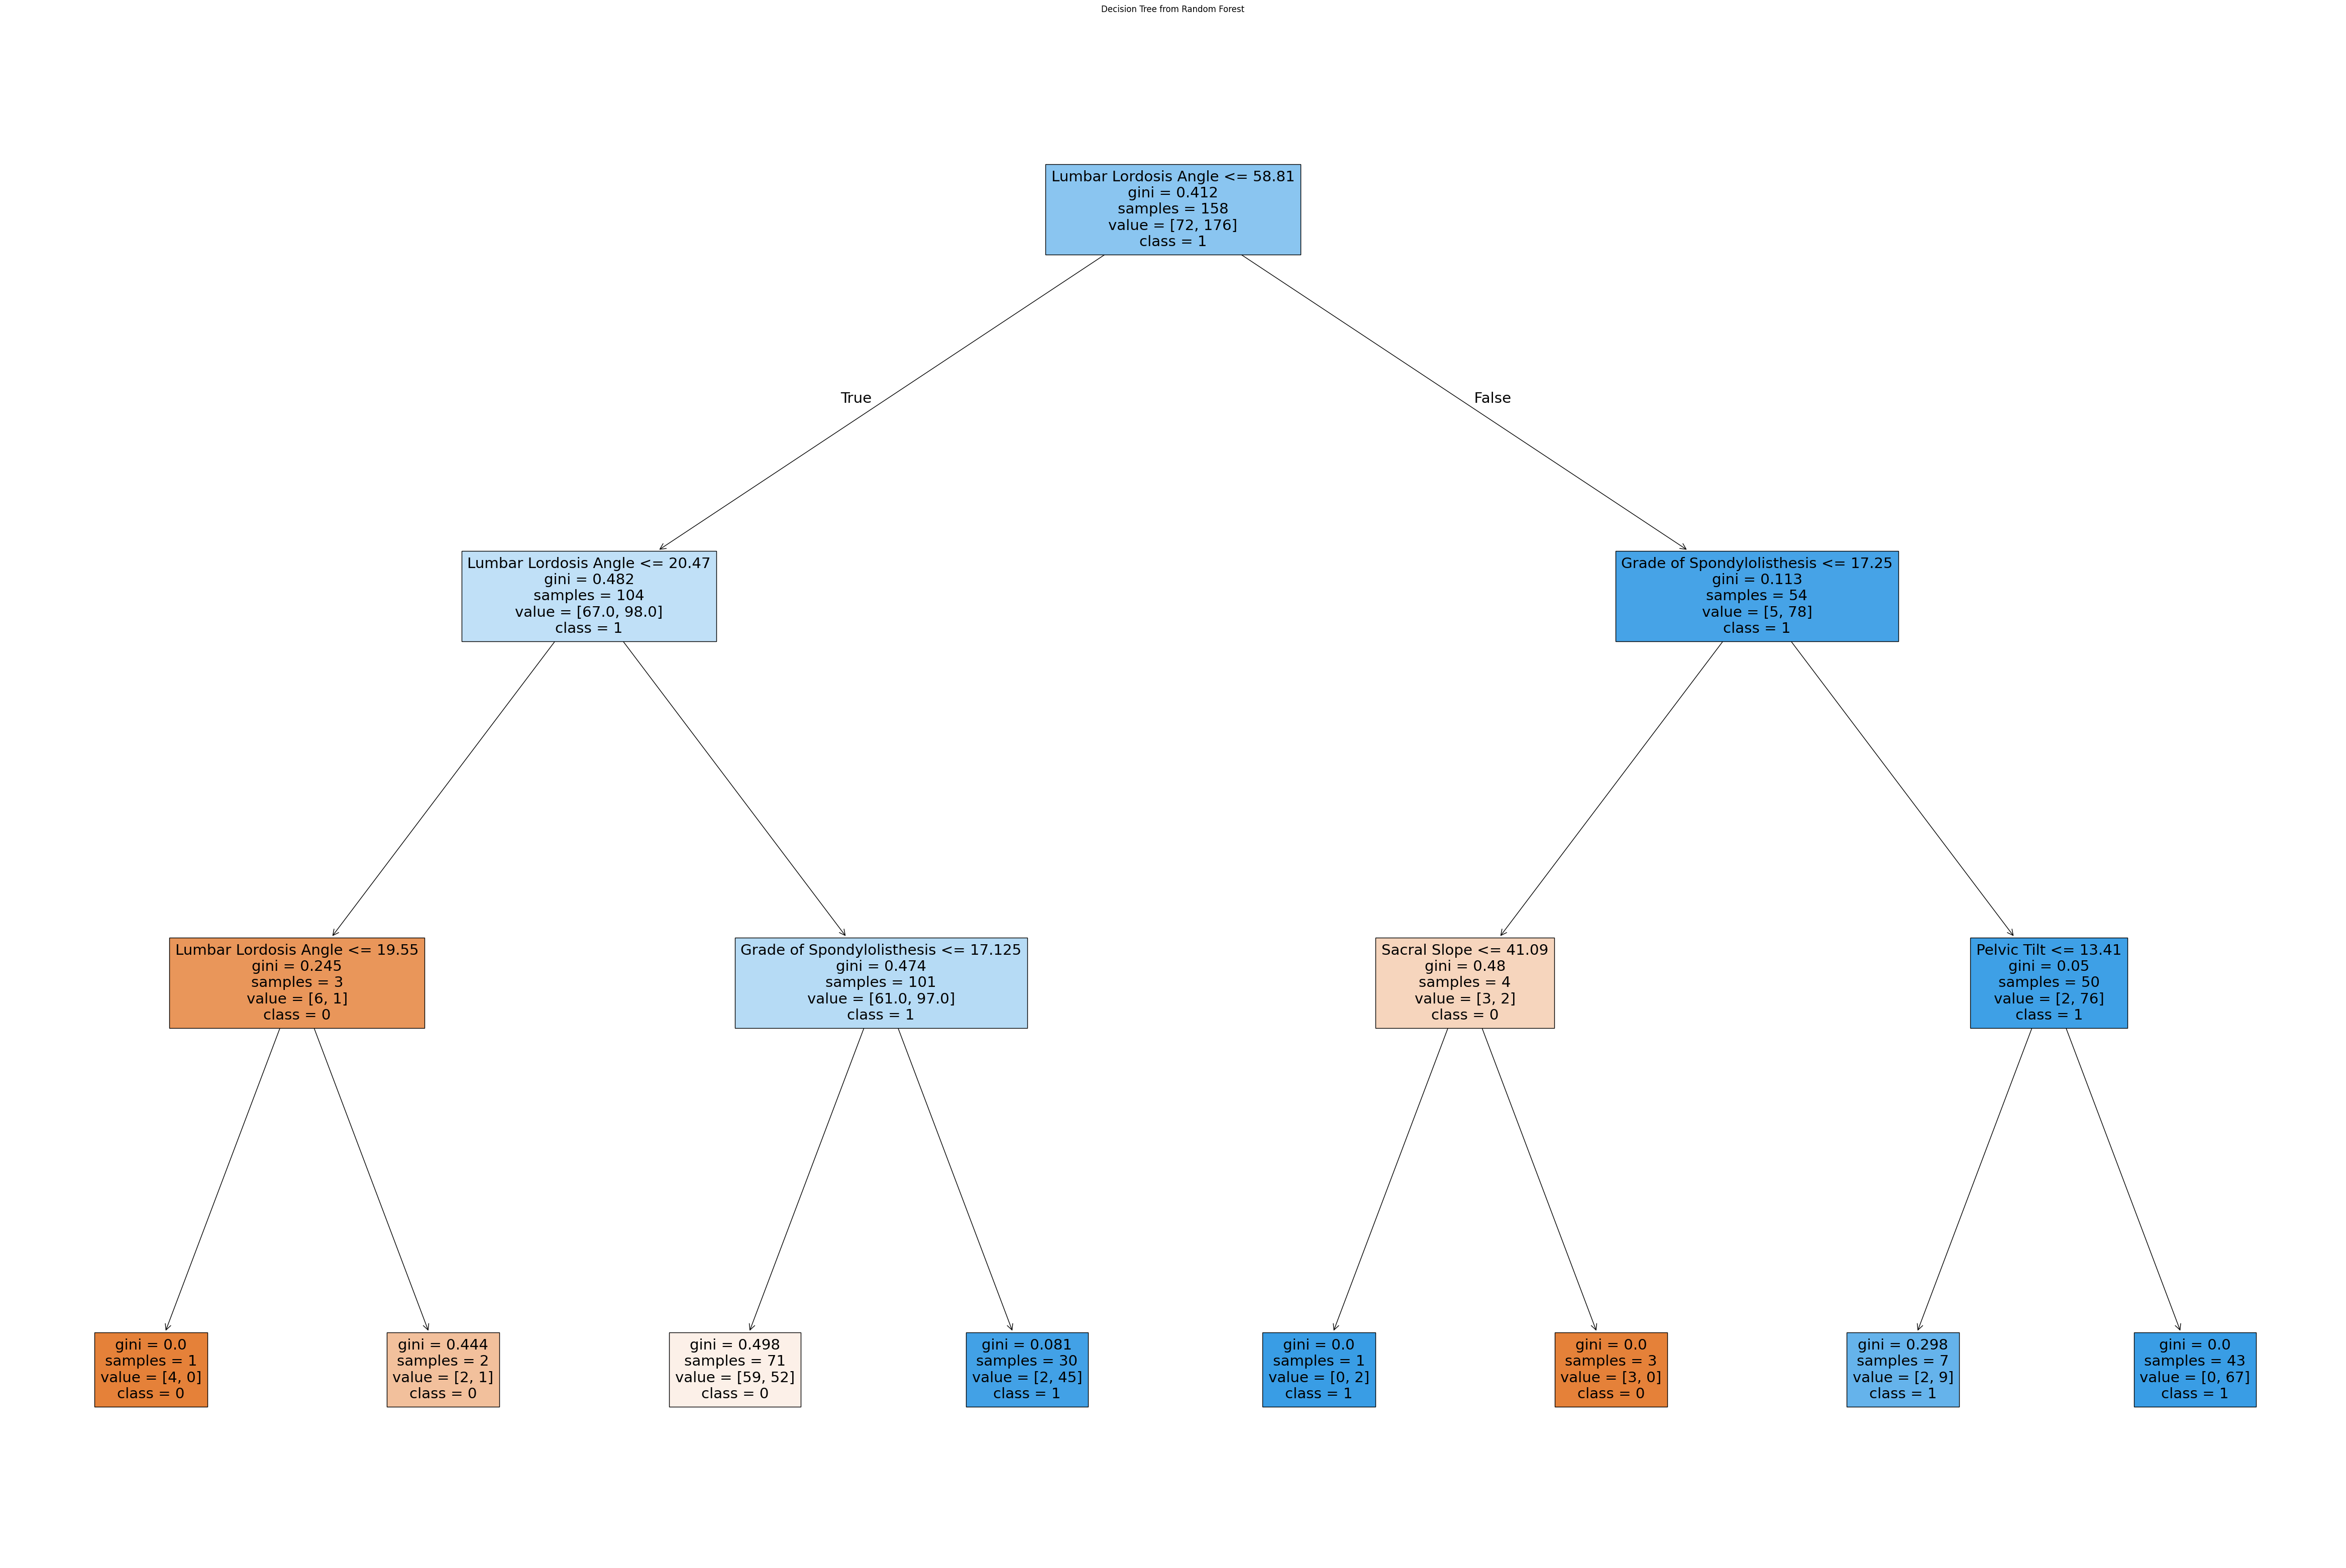

In [19]:
# Visualization: Plot one of the trees from the Random Forest
plt.figure(figsize=(60, 40))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()

### Support Vector Machine

In [20]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [21]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8709677419354839
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.93      0.88      0.90        42

    accuracy                           0.87        62
   macro avg       0.85      0.87      0.86        62
weighted avg       0.88      0.87      0.87        62



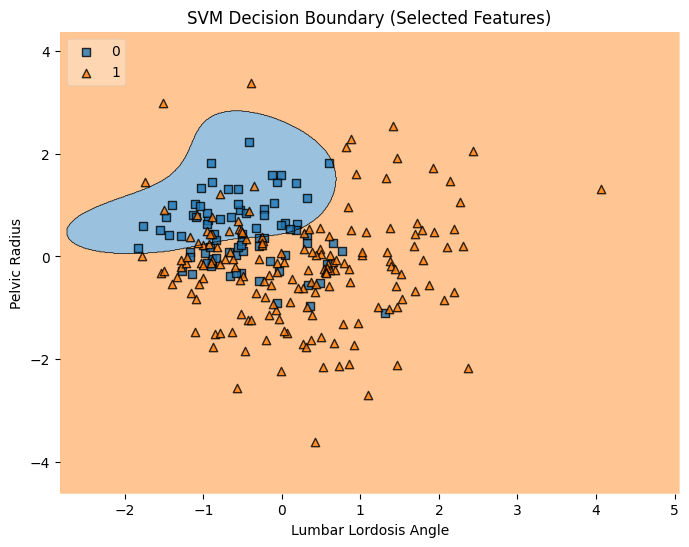

In [27]:
# Visualization: Decision Boundaries for SVM (using different features)
if X.shape[1] >= 4:
    selected_features = ["Lumbar Lordosis Angle", "Pelvic Radius"]  # Modify feature selection here
    feature_indices = [X.columns.get_loc(f) for f in selected_features]
    X_train_svm_vis = X_train_scaled[:, feature_indices]
    svm_model_vis = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
    svm_model_vis.fit(X_train_svm_vis, y_train)
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train_svm_vis, y_train.to_numpy(), clf=svm_model_vis, legend=2)
    plt.title("SVM Decision Boundary (Selected Features)")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

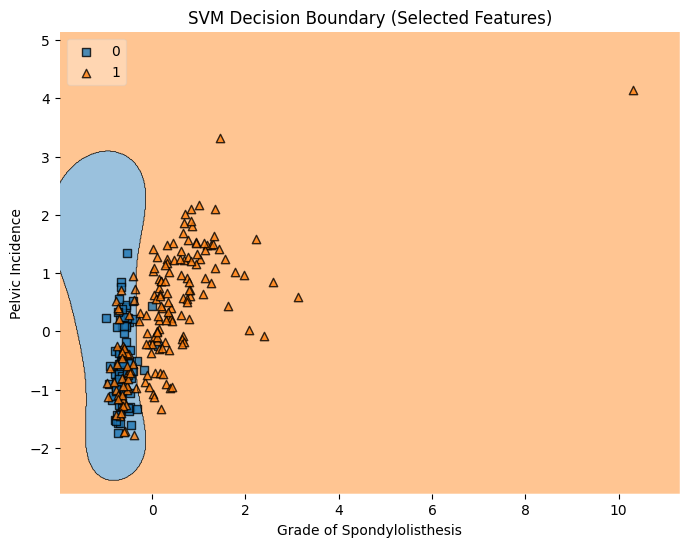

In [ ]:
# Visualization: Decision Boundaries for SVM (using different features)
if X.shape[1] >= 4:
    selected_features = ["Grade of Spondylolisthesis", "Pelvic Incidence"]  # Modify feature selection here
    feature_indices = [X.columns.get_loc(f) for f in selected_features]
    X_train_svm_vis = X_train_scaled[:, feature_indices]
    svm_model_vis = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
    svm_model_vis.fit(X_train_svm_vis, y_train)
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train_svm_vis, y_train.to_numpy(), clf=svm_model_vis, legend=2)
    plt.title("SVM Decision Boundary (Selected Features)")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

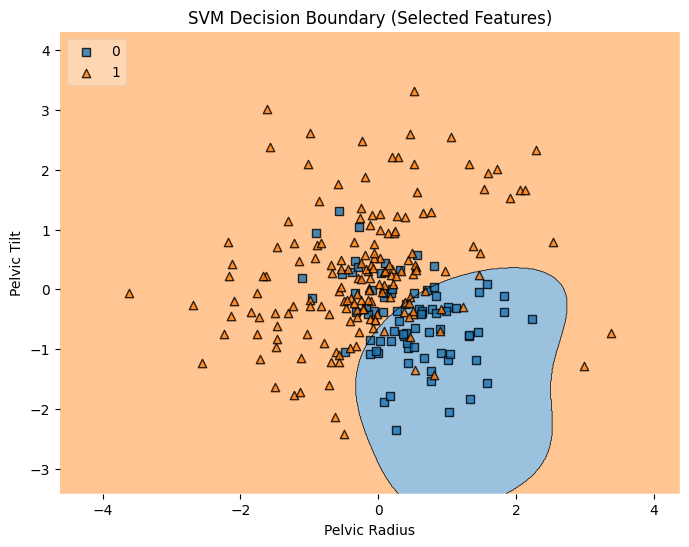

In [23]:
# Visualization: Decision Boundaries for SVM (using different features)
if X.shape[1] >= 4:
    selected_features = ["Pelvic Radius", "Pelvic Tilt"]  # Modify feature selection here
    feature_indices = [X.columns.get_loc(f) for f in selected_features]
    X_train_svm_vis = X_train_scaled[:, feature_indices]
    X_test_svm_vis = X_test_scaled[:, feature_indices]
    
    # Train a new SVM model using only the selected features
    svm_model_vis = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
    svm_model_vis.fit(X_train_svm_vis, y_train)
    
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train_svm_vis, y_train.to_numpy(), clf=svm_model_vis, legend=2)
    plt.title("SVM Decision Boundary (Selected Features)")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()
